In [2]:
from sklearn.datasets import load_iris
import pandas as pd 

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['flower'] = iris.target 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.drop(['sepal length (cm)', 'sepal width (cm)', 'flower'], axis = 1, inplace = True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


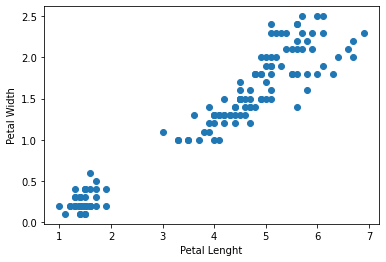

In [7]:
import matplotlib.pyplot as plt 
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel("Petal Lenght")
plt.ylabel("Petal Width")
plt.show()


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])


In [9]:
df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


**Elbow Method**

In [10]:
from sklearn.cluster import KMeans
sse = []
max_limit = 10
k_range = range(1,max_limit)
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

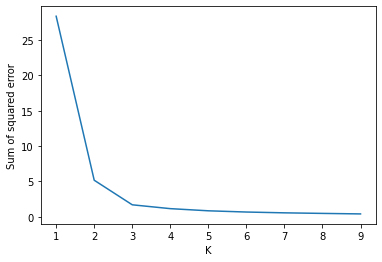

In [11]:
plt.plot(k_range, sse)
plt.ylabel("Sum of squared error")
plt.xlabel("K")
plt.show()

In [12]:
sse

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.1588792731667126,
 0.853861735391224,
 0.6801035704886196,
 0.5656776810037092,
 0.486178934934251,
 0.41326677825124736]

In [13]:
km = KMeans(n_clusters = 3)
yp = km.fit_predict(df)
yp 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
df['Cluster'] = yp 
df.head()

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [15]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]


<ipython-input-22-245f4a7a31eb>:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "tranparent" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname = 'clustering.png', tranparent = False)


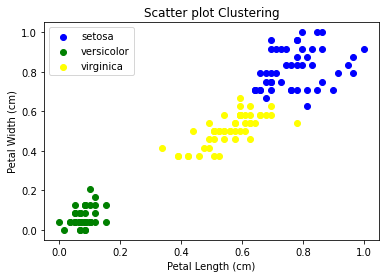

In [22]:
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue")
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color="green")
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color="yellow")
plt.legend([iris['target_names'][0], iris['target_names'][1], iris['target_names'][2]])
plt.title("Scatter plot Clustering")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.savefig(fname = 'clustering.png')
plt.show()